# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Azure DS Certification/Create Machine Learning Models On Azure/Semana3/Challenges/Data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


##Vistazo de los datos en 2 dimensiones

In [ ]:
#Requerimos estandarizar los valores de cada una de las columnas antes de aplicar cualquier tecnica de reduccion de dimensiones
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

In [ ]:
def Representacion(data, alg_reduccion, no_components=2):

  #Estandarizamos
  scaled_data=MinMaxScaler().fit_transform(data)

  #Ahora obtenemos la representacion en no_components dimensiones
  data_red=alg_reduccion(n_components=no_components).fit_transform(scaled_data)
  #data_red=red.transform(scaled_data)

  return(data_red)


def Reducted_Plot (data, dimension=2):

  %matplotlib inline

  if(dimension==2):
    plt.scatter(data[:,0],data[:,1])
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Data')
    plt.show()

###PCA Visualization

Observe a continuacion que los elementos graficados no parecen mostrar un conjunto de grupos tan claros, pero si se observa a detalle se pueden encontrar tendencias de que los puntos se acumulan en 3 grupos centrados aprox en -0.4, 0 y 0.4 de la dimension 1

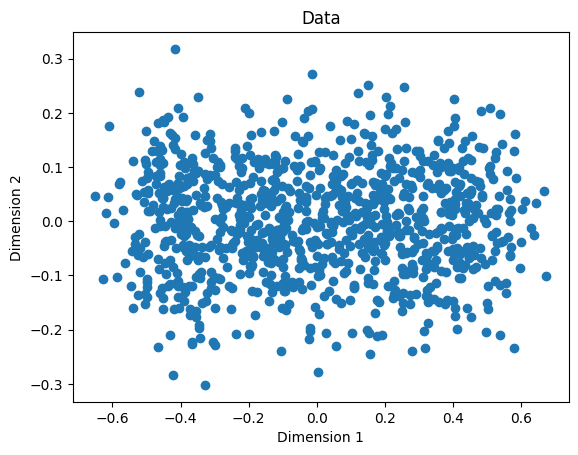

In [ ]:
data_pca=Representacion(data.values, PCA)

Reducted_Plot(data_pca)

###TSNE Visualization

En este caso el comportamiento general de los puntos coincide con el mostrado por PCA, pero si se analiza a nivel local TSNE fue capaz de construir una representacion con una clara muestra de 4 grupos para ser separados.

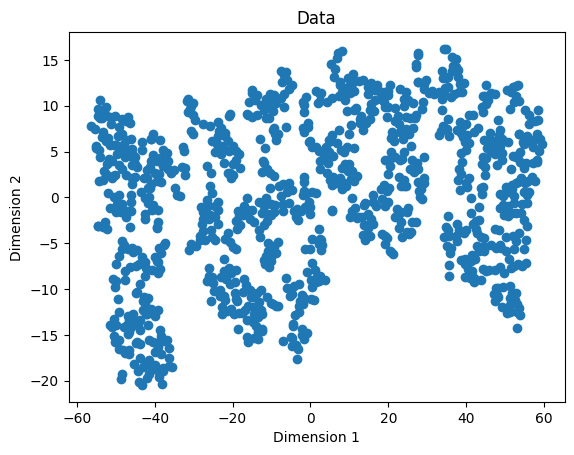

In [ ]:
data_tsne=Representacion(data.values, TSNE)

Reducted_Plot(data_tsne)

##K means

### PCA

####Eleccion del numero de cluster a utilizar

Sabemos que para este metodo se pueden utilizar las distancias intra-cluster para determinar un numero adecuado de clusters

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

def elbow_plot(data, max_clusters=10):
  wcss=[]
  %matplotlib inline
  for num_clusters in range(1,max_clusters+1):
    k_means=KMeans(n_clusters=num_clusters)
    k_means.fit(data)
    wcss.append(k_means.inertia_)
  #Plot the WCSS values onto a line graph
  plt.plot(range(1,max_clusters+1 ), wcss)
  plt.title('WCSS by Clusters')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()


def plot_clusters(samples, clusters):
    %matplotlib inline
    #Funciona hasta para 6 clusters
    col_dic = {0:'blue',1:'green',2:'orange', 3: 'red', 4: 'black', 5: 'fuchsia'}
    mrk_dic = {0:'v',1:'^',2:'s', 3: 'o', 4 : '>', 5: '<'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

#plot_clusters(features_2d, km_clusters)

Observe en la siguiente grafica que muestra la caida de la distancia dentro de cada cluster, la ultima caida significativa ocurre al utilizar 4 clusters, por lo que segun este criterio del Within Cluster Sum Square, ese es el numero adecuado de clusters.

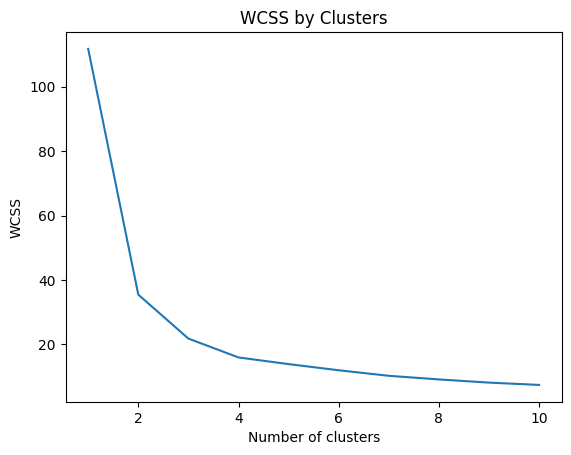

In [ ]:
elbow_plot(data_pca, 10)

####Resultado

Siguiendo el criterio del WCSS, mostramos los resultados de las agrupaciones  tomando como referencia 4 cluters

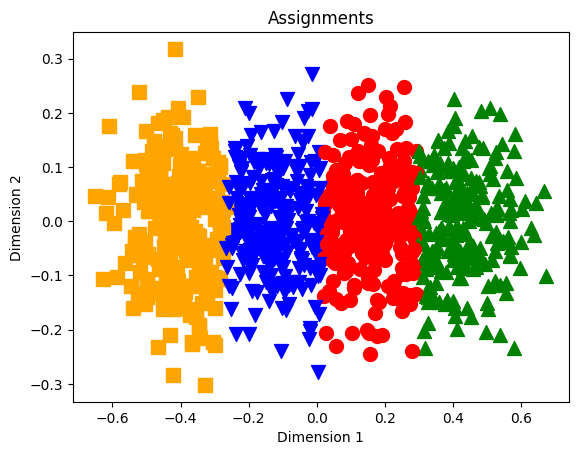

In [ ]:
k_means_clusters=KMeans(n_clusters=4).fit_predict(data_pca)

plot_clusters(data_pca, k_means_clusters)

Aunque genera un mayor WCSS, prefiero la version generada tomando 3 cluster para agrupar nuestra informacion

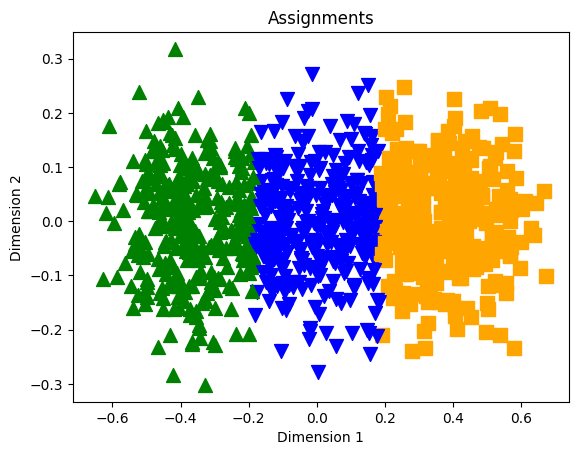

In [ ]:
k_means_clusters=KMeans(n_clusters=3).fit_predict(data_pca)

plot_clusters(data_pca, k_means_clusters)

### TSNE

#### Eleccion de Clusters

Tal y como se pudo observar en la grafica de TSNE, segun el criterio WCSS el numero adecuado de clusters para agrupan nuestros datos es 4 clusters

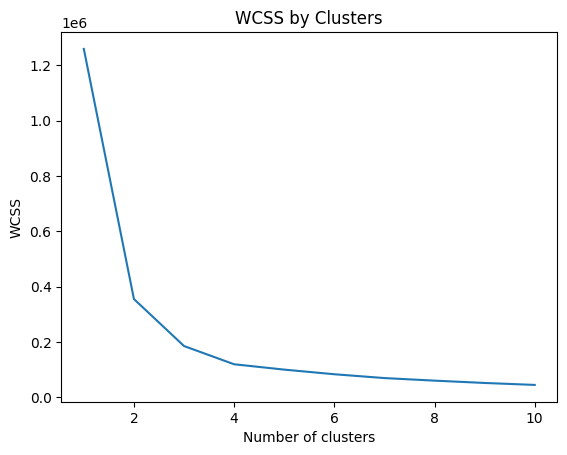

In [ ]:
elbow_plot(data_tsne, 10)

#### Resultado

Las agrupacciones que se podian deducir a simple vista son respetadas por K means

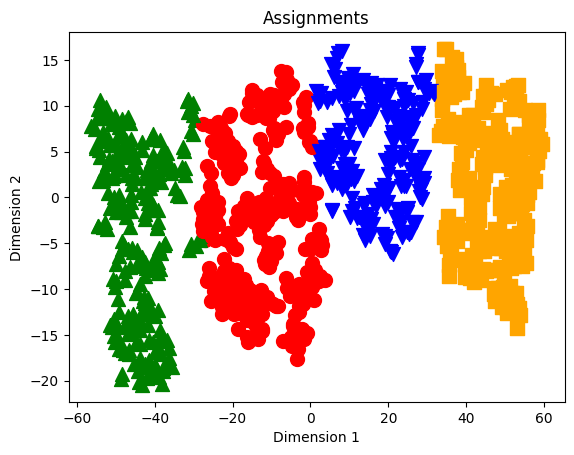

In [ ]:
k_means_clusters=KMeans(n_clusters=4).fit_predict(data_tsne)

plot_clusters(data_tsne, k_means_clusters)

## Hierarchical Clustering

In [ ]:
from sklearn.cluster import  AgglomerativeClustering

###PCA

#### Resultado

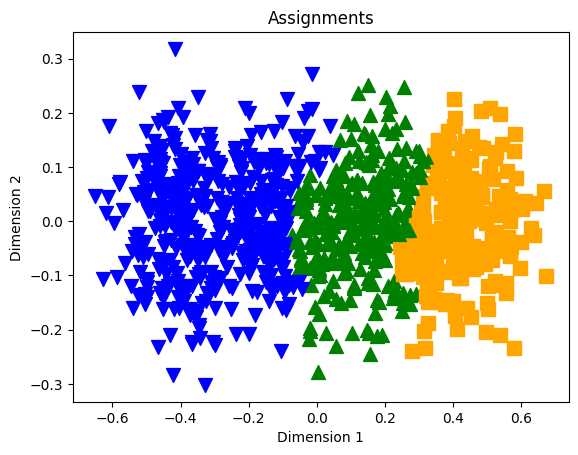

In [ ]:
hierarchical_pca_clusters=AgglomerativeClustering(n_clusters=3).fit_predict(data_pca)

plot_clusters(data_pca,hierarchical_pca_clusters)

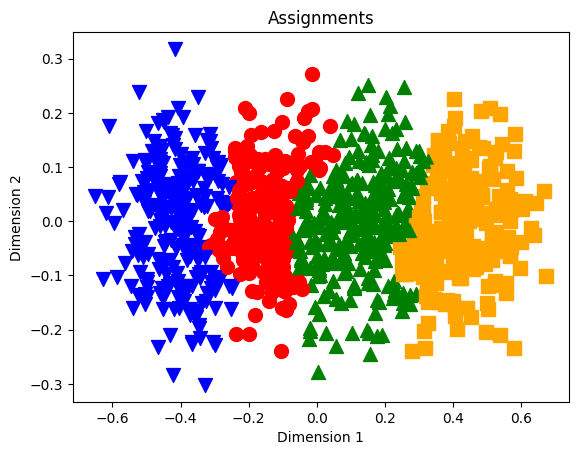

In [ ]:
hierarchical_pca_clusters=AgglomerativeClustering(n_clusters=4).fit_predict(data_pca)

plot_clusters(data_pca,hierarchical_pca_clusters)

### TSNE

#### Resultado

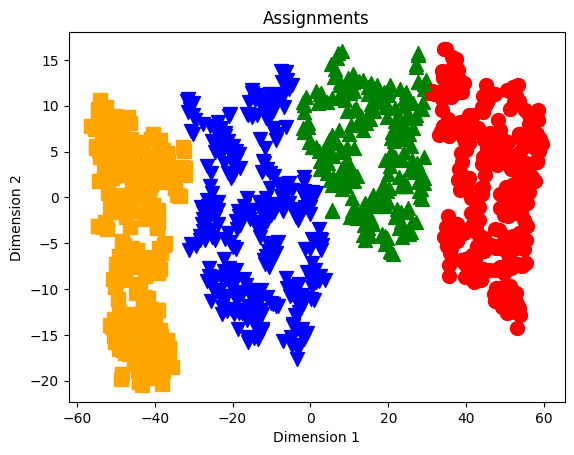

In [ ]:
hierarchical_tsne_clusters=AgglomerativeClustering(n_clusters=4).fit_predict(data_tsne)

plot_clusters(data_tsne,hierarchical_tsne_clusters)